In [18]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import json
import os
import pandas as pd
from tqdm import tqdm
import shutil
import sys
root_path = os.path.abspath("..")
data_path = "/data/MHL/bepro/raw"
sys.path.append(root_path)

from preprocess_bepro import load_single_json, create_team_dataframe, create_event_dataframe, create_tracking_dataframe
from visualization import plot_single_frame_positions, plot_window_frame_positions

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
match_id_lst = os.listdir(data_path)
match_id = "126315"

match_path = f"{data_path}/{match_id}"
os.listdir(match_path)

['126315_2_event_data.json',
 '126315_metadata.json',
 '126315_1_frame_data.jsonl',
 '126315_2_frame_data.jsonl',
 '126315_1_event_data.json']

In [4]:
# Check Metadata
meta_data_path = f"{match_path}/{match_id}_metadata.json"
meta_data = load_single_json(meta_data_path)
for key, value in meta_data.items():
    print(f"{key} : {value}")

match_id : 126315
match_title : 김천 상무 프로축구단 vs 광주FC
match_datetime : 2024-04-06T16:30:00+0900
match_full_time : 5400000
match_extra_time : None
periods : [{'period_name': '1st Half', 'period_order': 0, 'period_match_duration': 2700000}, {'period_name': '2nd Half', 'period_order': 1, 'period_match_duration': 2700000}]
home_team : {'team_id': 2353, 'team_name': '김천 상무 프로축구단', 'team_name_en': 'Gimcheon Sangmu', 'players': [{'player_id': 356626, 'team_id': 2353, 'shirt_number': '17', 'full_name': '김준홍', 'full_name_en': 'Joonhong Kim', 'initial_position_name': 'GK', 'is_starting': True}, {'player_id': 500576, 'team_id': 2353, 'shirt_number': '25', 'full_name': '박승욱', 'full_name_en': 'Seunguk Park', 'initial_position_name': 'CB', 'is_starting': True}, {'player_id': 500569, 'team_id': 2353, 'shirt_number': '15', 'full_name': '김봉수', 'full_name_en': 'Bongsoo Kim', 'initial_position_name': 'CB', 'is_starting': True}, {'player_id': 500562, 'team_id': 2353, 'shirt_number': '23', 'full_name': '박수일'

In [5]:
teams_dict = create_team_dataframe(meta_data['home_team'], meta_data['away_team'])
teams_dict['Home']

,player,position,team,jID,pID,tID,xID
0,Joonhong Kim,GK,Home,17,356626,2353,0
1,Seunguk Park,CB,Home,25,500576,2353,1
2,Bongsoo Kim,CB,Home,15,500569,2353,2
3,Suil Park,RB,Home,23,500562,2353,3
4,Mingyu Park,LB,Home,88,356609,2353,4
5,Hyeonmuk Kang,CAM,Home,14,356624,2353,5
6,Dong Hyun Kim,CM,Home,5,356616,2353,6
7,Jingyu Kim,CM,Home,4,356618,2353,7
8,Daewon Kim,RW,Home,22,500580,2353,8
9,Chiin Jeong,LW,Home,32,356615,2353,9


In [6]:
event_df = create_event_dataframe(match_path)
event_df.head()

,period_type,period_name,period_order,period_duration,period_start_time,event_time,team_name,player_shirt_number,player_name,events,x,y,to_x,to_y,attack_direction
0,Half,1st Half,0,2700000,0,2167,Gwangju FC,24,Kang Hyun Lee,"[{'event_name': 'Passes', 'property': {'Outcom...",0.500800,0.527100,0.657600,0.689500,LEFT
1,Half,1st Half,0,2700000,0,3000,Gimcheon Sangmu,18,Kanghyun Yu,"[{'name': 'VHIR', 'property': {'duration': 200...",0.533551,0.654105,0.637543,0.683009,RIGHT
2,Half,1st Half,0,2700000,0,3000,Gwangju FC,20,Kunhee Lee,"[{'name': 'VHIR', 'property': {'duration': 250...",0.482749,0.274083,0.354669,0.275258,LEFT
3,Half,1st Half,0,2700000,0,3500,Gwangju FC,11,Gabriel,"[{'name': 'VHIR', 'property': {'duration': 150...",0.467462,0.754444,0.398143,0.716478,LEFT
4,Half,1st Half,0,2700000,0,3967,Gwangju FC,6,Youngkyu Ahn,"[{'event_name': 'Passes Received', 'property':...",0.657600,0.689500,NaN,NaN,LEFT


In [7]:
match_path = f"{data_path}/{match_id}"

tracking_df = create_tracking_dataframe(match_path, meta_data, teams_dict)
tracking_df.head()

,game_id,period_id,timestamp,frame_id,ball_state,ori_ball_owning_team_id,x,y,z,vx,...,v,ax,ay,az,a,id,team_id,position_name,ball_owning_team_id,is_ball_carrier
0,126315,1.0,0 days 00:00:02.200000,55,alive,4648,10.6651,-15.7343,0.0,0.010984,...,0.017269,0.095604,0.331254,0.0,0.344774,145701,4648,LB,4648,False
1,126315,1.0,0 days 00:00:02.200000,55,alive,4648,49.4965,-1.8148,0.0,-0.000366,...,0.010506,-0.009143,0.157149,0.0,0.157415,250099,4648,GK,4648,False
2,126315,1.0,0 days 00:00:02.200000,55,alive,4648,0.2787,-15.3854,0.0,-0.789224,...,1.062552,-1.959916,-0.736736,0.0,2.093813,250102,4648,CF,4648,False
3,126315,1.0,0 days 00:00:02.200000,55,alive,4648,-16.2408,16.2649,0.0,-0.457413,...,0.469734,0.269950,0.664216,0.0,0.716976,356609,2353,LB,4648,False
4,126315,1.0,0 days 00:00:02.200000,55,alive,4648,0.0131,21.5149,0.0,0.946555,...,1.061619,0.088101,-6.456073,0.0,6.000000,356615,2353,LW,4648,False


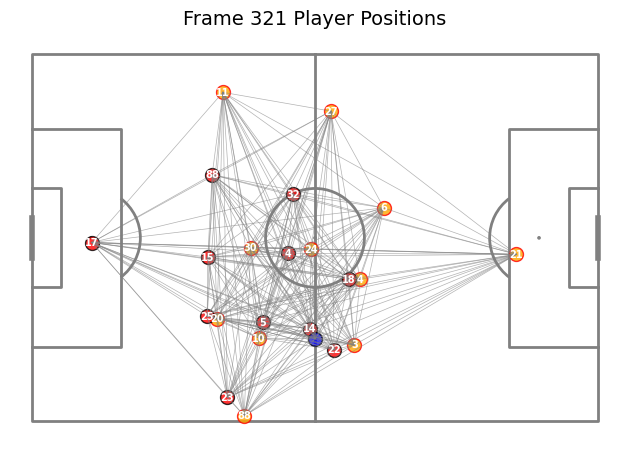

In [24]:
plot_single_frame_positions(tracking_df, period_id=1, frame_idx=291 + 30, home_team_info=teams_dict['Home'], away_team_info=teams_dict['Away'])